In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [30]:
exp_filename = "PLA_ST_N_RUPT"

In [31]:
# Open the .res file for reading
with open(exp_filename + ".info", "r") as file:
    # Initialize an empty dictionary to store the item values
    item_values = {}

    # Read each line in the file
    for line in file:
        # Split the line into item and value
        item, value = line.strip().split(":")

        # Store the value in the dictionary with the item name as the key
        item_values[item.strip()] = float(value.strip())

# Create variables with the item names as the variable names and assign the corresponding values
for item, value in item_values.items():
    globals()[item] = value

# Print the variables
print(item_values)

{'E': 3261.72, 'Rp02': 35.1729, 'Rm': 47.9696, 'Au': 0.0041578, 'A': -1.0, 'strain rate': -1.0, 'Kv': 547.668, 'Km': 1170.56, 'Kt': 1029.2, 'Adjustment Factor Eps': 0.93}


In [32]:
E = item_values["E"]
Rp02 = item_values["Rp02"]
adjustment_eps = item_values["Adjustment Factor Eps"]

print(E, Rp02, adjustment_eps)

3261.72 35.1729 0.93


In [33]:
# lecture des données traitées
res = np.genfromtxt(exp_filename + ".res")[:]
print(res.shape)

(1000, 6)


In [34]:
eps_col = 1
eps_t_col = 3
sig_col = 4
sig_t_col = 5

In [35]:
sig = res[:, sig_col]
sig

array([ 0.45621606,  0.51881616,  0.57221719,  0.64297236,  0.70187571,
        0.75783259,  0.83085218,  0.88068965,  0.95797116,  1.01382291,
        1.08135624,  1.15469114,  1.21005183,  1.27387687,  1.32318416,
        1.38469055,  1.46042099,  1.52044857,  1.59126069,  1.65803703,
        1.69752799,  1.7579779 ,  1.82886273,  1.89293023,  1.95443219,
        2.01538206,  2.07626262,  2.14775717,  2.21258648,  2.26229653,
        2.3316986 ,  2.39185125,  2.45643933,  2.51451419,  2.5775456 ,
        2.64125808,  2.71091581,  2.7631461 ,  2.82959433,  2.87953846,
        2.95268025,  3.00853719,  3.06842936,  3.11958372,  3.18478115,
        3.25049852,  3.31050807,  3.37262662,  3.42613832,  3.48463341,
        3.55888809,  3.61402585,  3.66276428,  3.73310837,  3.80326518,
        3.8616467 ,  3.92569794,  3.9742715 ,  4.04317388,  4.09142122,
        4.15363441,  4.23041708,  4.28966188,  4.33976606,  4.40872842,
        4.46210444,  4.52609127,  4.58281705,  4.65618494,  4.70

In [36]:
# on se limite à rm et sig > 0
sig_thresh = 0
id_max = np.argmax(sig)
res = res[sig > sig_thresh]
res = res[:id_max]

res

array([[0.00000000e+00, 1.39869600e-04, 0.00000000e+00, 1.39859800e-04,
        4.56216060e-01, 4.56279870e-01],
       [0.00000000e+00, 1.57582600e-04, 0.00000000e+00, 1.57570200e-04,
        5.18816160e-01, 5.18897917e-01],
       [0.00000000e+00, 1.75295600e-04, 0.00000000e+00, 1.75280200e-04,
        5.72217188e-01, 5.72317495e-01],
       ...,
       [0.00000000e+00, 1.77820100e-02, 0.00000000e+00, 1.76257596e-02,
        4.78385206e+01, 4.86891857e+01],
       [0.00000000e+00, 1.77997230e-02, 0.00000000e+00, 1.76431630e-02,
        4.78868833e+01, 4.87392566e+01],
       [0.00000000e+00, 1.78174360e-02, 0.00000000e+00, 1.76605661e-02,
        4.79534403e+01, 4.88078477e+01]])

In [37]:
# lecture des données vraies
eps_t = res[:, eps_t_col]
sig_t = res[:, sig_t_col]

eps = res[:, eps_col]
sig = res[:, sig_col]

# déformation plastique
# we use the adjustment factor for the plastic strain
p = eps_t - adjustment_eps * sig_t / E

In [38]:
res, sig,

(array([[0.00000000e+00, 1.39869600e-04, 0.00000000e+00, 1.39859800e-04,
         4.56216060e-01, 4.56279870e-01],
        [0.00000000e+00, 1.57582600e-04, 0.00000000e+00, 1.57570200e-04,
         5.18816160e-01, 5.18897917e-01],
        [0.00000000e+00, 1.75295600e-04, 0.00000000e+00, 1.75280200e-04,
         5.72217188e-01, 5.72317495e-01],
        ...,
        [0.00000000e+00, 1.77820100e-02, 0.00000000e+00, 1.76257596e-02,
         4.78385206e+01, 4.86891857e+01],
        [0.00000000e+00, 1.77997230e-02, 0.00000000e+00, 1.76431630e-02,
         4.78868833e+01, 4.87392566e+01],
        [0.00000000e+00, 1.78174360e-02, 0.00000000e+00, 1.76605661e-02,
         4.79534403e+01, 4.88078477e+01]]),
 array([ 0.45621606,  0.51881616,  0.57221719,  0.64297236,  0.70187571,
         0.75783259,  0.83085218,  0.88068965,  0.95797116,  1.01382291,
         1.08135624,  1.15469114,  1.21005183,  1.27387687,  1.32318416,
         1.38469055,  1.46042099,  1.52044857,  1.59126069,  1.65803703,
   

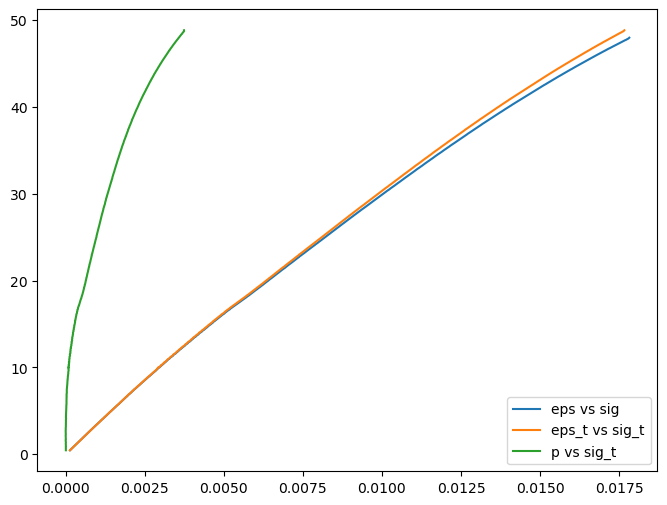

In [39]:
# Plot eps against sig
plt.figure(figsize=(8, 6))
plt.plot(eps, sig, label="eps vs sig")

# Plot eps_t against sig_t
plt.plot(eps_t, sig_t, label="eps_t vs sig_t")

# Plot p against sig_t
plt.plot(p, sig_t, label="p vs sig_t")
plt.legend()
plt.show()

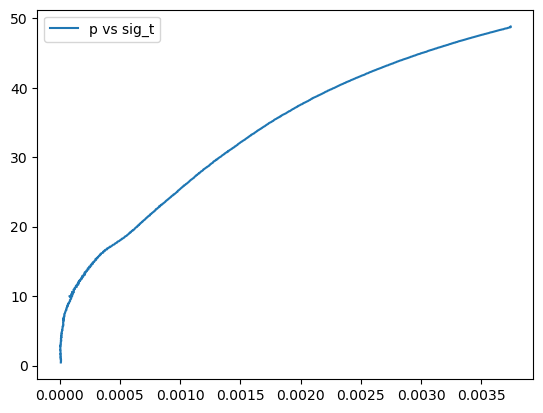

In [40]:
# Plot p against sig_t
plt.plot(p, sig_t, label="p vs sig_t")
plt.legend()
plt.show()

# # interpolate the plastic strain and true stress in the Johnson Cook zone
# from scipy.interpolate import interp1d

# sig_t_JC_interp_fun = interp1d(p, sig_t)
# p_smooth = np.linspace(p[0], p[-1], 200)
# sig_t_JC_interp = sig_t_JC_interp_fun(p_smooth)

# plt.plot(p_smooth, sig_t_JC_interp, label="sig_t_JC_interp")
# plt.show()

In [41]:
# reorder
# print(p_smooth)
# p_smooth_sorted = np.sort(p_smooth)
# # check if the sorted is equal to the original
# print(np.allclose(p_smooth, p_smooth_sorted))

# # same for sig_t_JC_interp
# sig_t_JC_interp_sorted = np.sort(sig_t_JC_interp)
# print(np.allclose(sig_t_JC_interp, sig_t_JC_interp_sorted))

# # use the reordred stress for the rest
# sig_t_JC_interp = sig_t_JC_interp_sorted

# Loi puissance


Le modèle de puissance à fit est sans doute pas adapté sur tout la plage de valeur, serait pertinent de se restreindre à la partie plastique


In [42]:
# restriction de la zone de fitting du modèle à la partie plastique, au delà d'une certaine valeur du Rp02
plastic_zone = (sig > Rp02 * 1.0) & (p < 0.02)


filtered_sig_t = sig_t[plastic_zone]


filtered_eps_t = eps_t[plastic_zone]


filtered_p = p[plastic_zone]

In [43]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def power_law(log_x, log_A, n):
    return log_A + n * log_x


def exp_power_law(x, A, n):
    return A * x**n


# log of experimental data to pass to regression model
log_filtered_p = np.log(filtered_p)
log_filtered_sig_t = np.log(filtered_sig_t)


params, params_covariance = curve_fit(
    f=power_law, xdata=log_filtered_p, ydata=log_filtered_sig_t
)

log_A = params[0]  # Convert back from log(A)
n = params[1]

print(f"log_A: {log_A}, n: {n}")

log_A: 6.282707438848773, n: 0.4270404986531525


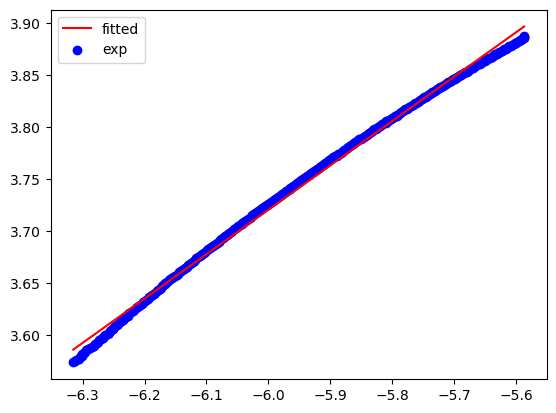

In [44]:
# fitted curve
delta_x = 200
log_xp = np.linspace(min(log_filtered_p), max(log_filtered_p), delta_x)
fitted_log_filtered_sig_t = log_A + log_xp * n

plt.plot(log_xp, fitted_log_filtered_sig_t, c="r", label="fitted")


plt.scatter(log_filtered_p, log_filtered_sig_t, c="b", label="exp")
plt.legend()


plt.show()

In [45]:
# conversion back to exponential data
A = np.exp(log_A)


x_p = np.exp(log_xp)

print(A, n)

535.2358221533759 0.4270404986531525


In [46]:
fitted_filtered_sig_t = exp_power_law(x_p, A, n)

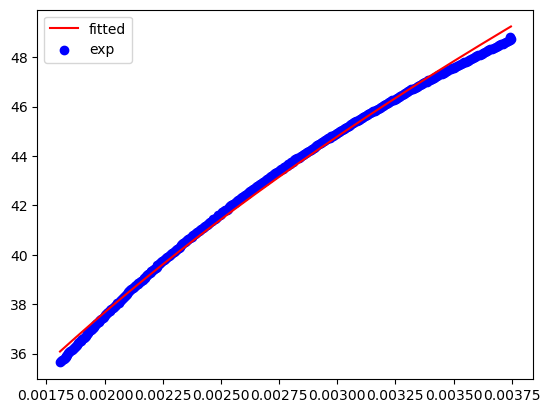

In [47]:
plt.plot(x_p, fitted_filtered_sig_t, c="r", label="fitted")
plt.scatter(filtered_p, filtered_sig_t, c="b", label="exp")
plt.legend()


plt.show()

In [48]:
# create even discretization of deformation
x_eps = np.linspace(0, max(p), delta_x)
power_law_y = exp_power_law(x_eps, A, n)

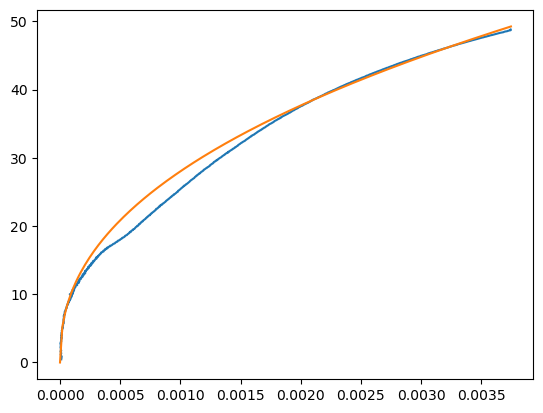

In [49]:
plt.plot(p, sig_t)
plt.plot(x_eps, power_law_y)
plt.show()

# Johnson-Cook Law


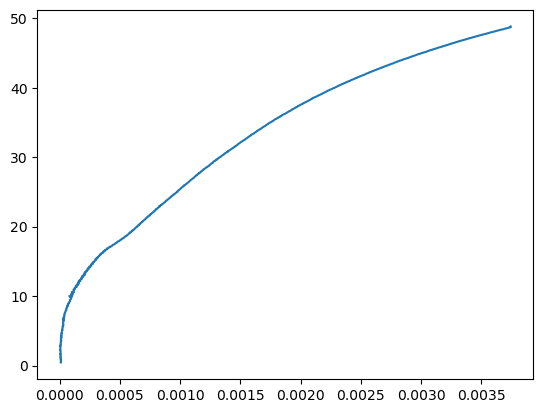

In [50]:
# définition de la zone d'estimation de la loi Johnson Cook


plastic_zoneJC = (sig_t > Rp02 * 1.0) & (p < max(p))

plt.plot(p, sig_t)
plt.show()


# plastic_zoneJC_interp = (sig_t_JC_interp > Rp02 * 1.0) & (
#     p_smooth < 0.9 * p_smooth[np.argmax(sig_t_JC_interp)]
# )


# # p_JC = p[plastic_zoneJC]
# # sig_t_JC = sig_t[plastic_zoneJC]

# p_smooth_plastic = p_smooth[plastic_zoneJC_interp]
# sig_t_interp_plastic = sig_t_JC_interp[plastic_zoneJC_interp]


# plt.scatter(p_smooth_plastic, sig_t_interp_plastic)
# plt.show()

# # interpolate the plastic strain and true stress in the Johnson Cook zone
# from scipy.interpolate import interp1d

# sig_t_JC_interp_fun = interp1d(p_JC, sig_t_JC)
# sig_t_JC_interp = sig_t_JC_interp_fun(p_JC)

In [51]:
def JC_law(x, A, B, n):
    return A + B * x**n


paramsJC, params_covarianceJC = curve_fit(f=JC_law, xdata=p, ydata=sig_t)

# paramsJC, params_covarianceJC = curve_fit(
#     f=JC_law, xdata=p_smooth_plastic, ydata=sig_t_interp_plastic
# )

A, B, n = paramsJC[0], paramsJC[1], paramsJC[2]

C:\Users\Jules\AppData\Local\Temp\ipykernel_2564\2290309441.py:2: RuntimeWarning: overflow encountered in power
  return A + B * x**n


In [52]:
print(A, B, n)

1.30182390044613 838.7167510957519 0.509132086898924


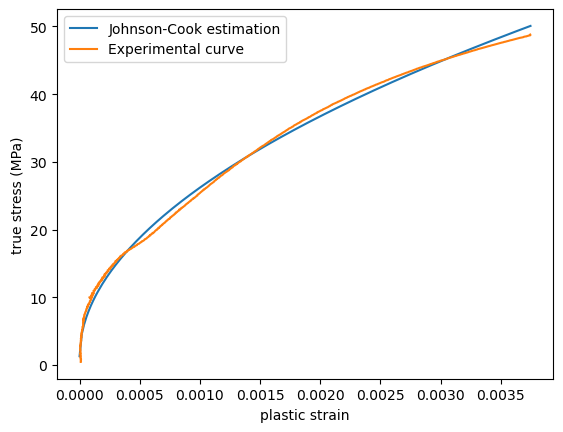

In [53]:
# JC estimation of the even discretization
sig_t_JC_x = JC_law(x_eps, A, B, n)
plt.plot(x_eps, sig_t_JC_x, label="Johnson-Cook estimation")
plt.plot(p, sig_t, label="Experimental curve")
plt.xlabel("plastic strain")
plt.ylabel("true stress (MPa)")
plt.legend()
plt.show()

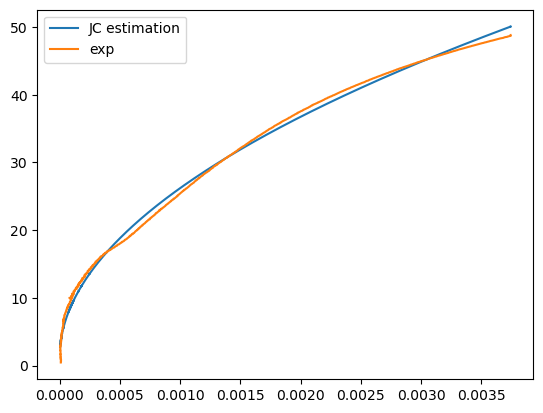

In [54]:
# estimate by JC image of palstic deformation p
sig_t_JC_p = JC_law(p, A, B, n)
plt.plot(p, sig_t_JC_p, label="JC estimation")
plt.plot(p, sig_t, label="exp")
plt.legend()
plt.show()

In [55]:
# Calculate the R-squared score
r_squared = r2_score(sig_t[plastic_zoneJC], sig_t_JC_p[plastic_zoneJC])

print(f"R-squared: {r_squared}")

R-squared: 0.9695406726057518


### Save results into txt file


In [56]:
infos = []
infos.append("A: %g" % (A))
infos.append("B: %g" % (B))
infos.append("n: %g" % (n))
infos.append("r2: %g" % (r_squared))

fic = open(exp_filename + "-identification.info", "w")
for info in infos:
    fic.writelines(info + "\n")
fic.close()

# ~ Si on veut lire l'ensemble du fichier il suffit d'ouvrir le fichier en lecture comme suit :
f = open(exp_filename + "-identification.info", "r")
infos = f.read()
f.close
print(infos)

A: 1.30182
B: 838.717
n: 0.509132
r2: 0.969541

